In [2]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import argparse
import imutils

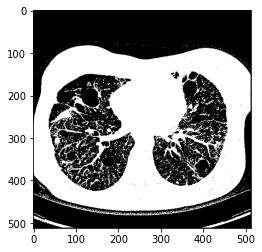

In [3]:
path = "image/ILD/2/gray/FILE0_gray.jpg"
img = cv2.imread(path , 0)
plt.imshow(img , 'gray')
canny = cv2.Canny(img , 30 , 150)

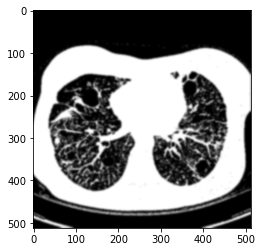

In [4]:
blurred = cv2.GaussianBlur(img, (11, 11), 0)#高斯模糊化
plt.imshow(blurred , 'gray')

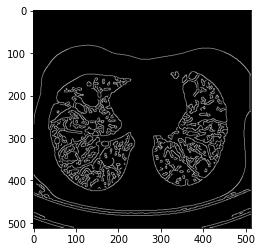

In [86]:
canny = cv2.Canny(blurred , 30 , 150)
plt.imshow(canny , 'gray')

In [91]:
def segmentation(rootpath , image):
#     path = "image/ILD/06753077/gray/FILE0_gray.jpg"
    path = rootpath + "/gray/" + image
    img = cv2.imread(path , 0)
    # blurred = cv2.GaussianBlur(img, (11, 11), 0)#高斯模糊化
    canny = cv2.Canny(img , 30 , 150)#threshold_one and threshold_two
    # canny = cv2.Canny(img , 30 , 150)
    canny = cv2.dilate(canny , None)
    canny = cv2.erode(canny , None)

    #Parameter 
    BLUR = 21
    MASK_DILATE_ITER = 10
    MASK_ERODE_ITER = 10
    MASK_COLOR = (0.0 , 0.0 , 0.0) #In RGB format

    contour_info = []
    contours,_ = cv2.findContours(canny , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
    for c in contours:
        contour_info.append((
            c,
            cv2.isContourConvex(c),
            cv2.contourArea(c),
        ))

    contour_info = sorted(contour_info , key = lambda c: c[2] , reverse = True)
    # max_contour = max_contour + contour_info[1]
    # plt.imshow(canny)
    #create empty mask, draw filled polygon on its corresponding to largest contour
    #Mask is black, polygon is white
    mask = np.zeros(canny.shape)
    max_contour = contour_info[1]
    cv2.fillConvexPoly(mask , max_contour[0] , (255))

    max_contour = contour_info[0]
    cv2.fillConvexPoly(mask , max_contour[0] , (255))
#     max_contour = contour_info[4]
#     cv2.fillConvexPoly(mask , max_contour[0] , (255))
#     max_contour = contour_info[5]
#     cv2.fillConvexPoly(mask , max_contour[0] , (255))
    plt.imshow(mask)
    #smooth mask then blur it
    mask = cv2.dilate(mask , None , iterations = MASK_DILATE_ITER)
    mask = cv2.erode(mask , None , iterations = MASK_ERODE_ITER)
    mask = cv2.GaussianBlur(mask , (BLUR , BLUR) , 0)
    # mask_stack = np.zeros(mask.shape)
    mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

    #-- Blend masked img into MASK_COLOR background --------------------------------------
    mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
    img         = img.astype('float32') / 255.0                 #  for easy blending

    img = img[: , : , np.newaxis]
    masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
    masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

    # cv2.imshow('img' , masked)       # Display
    plt.imshow(mask)
    cv2.imwrite((rootpath + "/mask/" + image.split('.')[0] + "_masked.jpg"), masked)
    # cv2.waitKey()

    # plt.imshow(canny , 'gray')

In [6]:
path = "image/ILD/1/"#change XXX to specific folder
des_path = path + "/mask" 
if not os.path.isdir(des_path):#create mask file in each image file
    os.mkdir(des_path)
imagelist = []
filename = r".jpg"#confirm the file name end with jpg
for file in os.listdir((path + "/gray")):
    if file.endswith(filename):
        imagelist.append(file)
print(len(imagelist))
print(path)
image_path = path + "/gray"
count = 0
# for image in imagelist:
#     print(count)
#     print(image)
#     count = count + 1
for image in imagelist: #imagelist 為 jpg 檔的名稱
#     segmentation(path , image)
    print(image)
# plt.imshow("image/ILD/06753077/gray/FILE0_gray.jpg")

36
image/ILD/1/
FILE0_gray.jpg
FILE10_gray.jpg
FILE11_gray.jpg
FILE12_gray.jpg
FILE13_gray.jpg
FILE14_gray.jpg
FILE15_gray.jpg
FILE16_gray.jpg
FILE17_gray.jpg
FILE18_gray.jpg
FILE19_gray.jpg
FILE1_gray.jpg
FILE20_gray.jpg
FILE21_gray.jpg
FILE22_gray.jpg
FILE23_gray.jpg
FILE24_gray.jpg
FILE25_gray.jpg
FILE26_gray.jpg
FILE27_gray.jpg
FILE28_gray.jpg
FILE29_gray.jpg
FILE2_gray.jpg
FILE30_gray.jpg
FILE31_gray.jpg
FILE32_gray.jpg
FILE33_gray.jpg
FILE34_gray.jpg
FILE35_gray.jpg
FILE3_gray.jpg
FILE4_gray.jpg
FILE5_gray.jpg
FILE6_gray.jpg
FILE7_gray.jpg
FILE8_gray.jpg
FILE9_gray.jpg


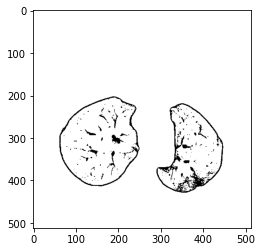

In [75]:
path = 'Seminar/test2.jpg'
img = cv2.imread(path , 0)
plt.imshow(img , 'gray')

In [87]:
path = "image/ILD/12077743"
des_path = path + "/mask" 
if not os.path.isdir(des_path):#create mask file in each image file
    os.mkdir(des_path)
imagelist = []
filename = r".jpg"#confirm the file name end with jpg
for file in os.listdir((path + "/gray")):
    if file.endswith(filename):
        imagelist.append(file)
print(len(imagelist))

FileNotFoundError: [WinError 3] 系統找不到指定的路徑。: 'image/ILD/12077743/mask'